In [2]:
# Importamos librerías
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargamos los datos
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Limpiamos los datos
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [47]:
# Muestra del dataset.

df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
104032,Senior Data Analyst,Senior Data Analyst,Anywhere,via Recruit.net,Full-time,True,"Illinois, United States",2023-01-02 00:03:00,False,True,United States,None,NaN,NaN,LTK (formerly rewardStyle & LIKEtoKNOW.it),"[sql, python, r, redshift, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'clou..."
60632,Data Analyst,IT Marketing Analytics,Italy,via BeBee,Full-time,False,Italy,2023-11-07 06:40:34,True,False,Italy,None,NaN,NaN,Confidenziale,[excel],{'analyst_tools': ['excel']}
173326,Senior Data Engineer,SR AWS Big Data Engineer,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-06-08 15:25:25,False,False,United States,None,NaN,NaN,Han IT Staffing,"[python, sql, bash, shell, aws, hadoop, spark]","{'cloud': ['aws'], 'libraries': ['hadoop', 'sp..."
503863,Data Analyst,Data Analyst IV,"Tallahassee, FL",via BeBee,Full-time,False,Georgia,2023-10-21 12:04:36,False,True,United States,None,NaN,NaN,Centene Corporation,"[sql, python, r, excel, power bi, visio]","{'analyst_tools': ['excel', 'power bi', 'visio..."
382013,Data Scientist,Data Scientist | $130K-$160K + Benefits | MUST...,"Philadelphia, PA",via SmartRecruiters Job Search,Full-time,False,"New York, United States",2023-07-06 18:02:39,False,True,United States,None,NaN,NaN,IT Pros,[python],{'programming': ['python']}
535252,Data Engineer,Data Engineer,"Tassin-la-Demi-Lune, France",via BeBee,Full-time,False,France,2023-05-25 19:35:38,True,False,France,None,NaN,NaN,Mérieux NutriSciences,"[sql, python, terraform]","{'other': ['terraform'], 'programming': ['sql'..."
531127,Data Scientist,Devops Data,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-10-17 19:25:44,True,False,France,None,NaN,NaN,Scaleway,"[python, go, bash, rust]","{'programming': ['python', 'go', 'bash', 'rust']}"
472409,Cloud Engineer,Коуч для штучного інтелекту,"Kyiv, Ukraine",via Robota.ua,Full-time,False,Ukraine,2023-11-02 14:43:29,True,False,Ukraine,None,NaN,NaN,Fozzy Group,None,None
268652,Data Analyst,Data Analyst,South Africa,via Trabajo.org,Full-time,False,South Africa,2023-08-03 07:14:21,False,False,South Africa,None,NaN,NaN,AJ Personnel,"[go, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
530272,Data Analyst,"Data Analyst, Master Data","El Segundo, CA",via LinkedIn,Full-time,False,"California, United States",2023-10-27 19:00:38,False,True,United States,None,NaN,NaN,Liquid I.V.,"[sql, azure, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'clou..."


In [16]:
# Creamos un DataFrame que contenga sólo los trabajos ubicados en Argentina
df_ARG = df[(df['job_country'] == 'Argentina')]

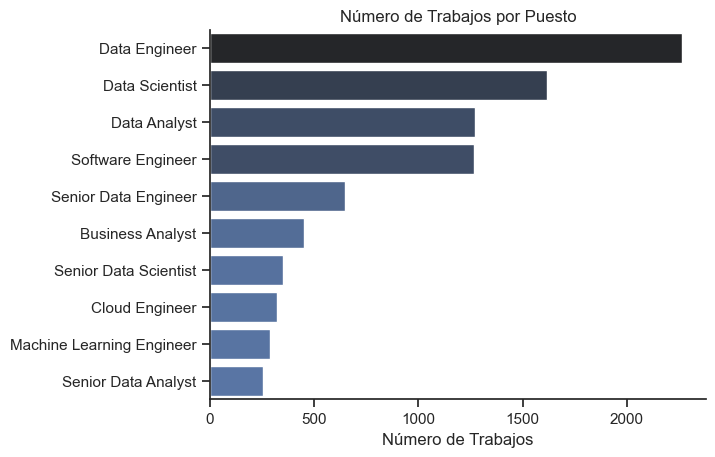

In [17]:
# Usamos la herramienta de Pandas que nos permite agrupar y ordenar los trabajos por popularidad.
df_plot = df_ARG['job_title_short'].value_counts().to_frame()

# Con ayuda de Matplotlib y Seaborn creamos una visualización personalizada.
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Número de Trabajos por Puesto')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

In [ ]:
# Creamos un DataFrame en el que filtremos por nuestro trabajo de interés.
job_name = 'Data Analyst'

df_job_ARG = df_ARG[df_ARG['job_title_short'] == job_name]

df_job_ARG['job_location'] = df_job_ARG['job_location'].replace('Argentina', 'No Especifica')
df_job_ARG['job_location'] = df_job_ARG['job_location'].replace('Anywhere', 'Trabajo Remoto')

df_job_ARG

In [31]:
# Agrupamos y ordenamos según la ubicación.

df_plot = df_job_ARG['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
"Buenos Aires, Argentina",630
No Especifica,398
Trabajo Remoto,88
"Córdoba, Córdoba Province, Argentina",30
"Córdoba, Cordoba, Argentina",17
"Olivos, Buenos Aires Province, Argentina",11
"Thames, Buenos Aires Province, Argentina",11
"Rosario, Santa Fe Province, Argentina",11
"Federal, Entre Rios, Argentina",8


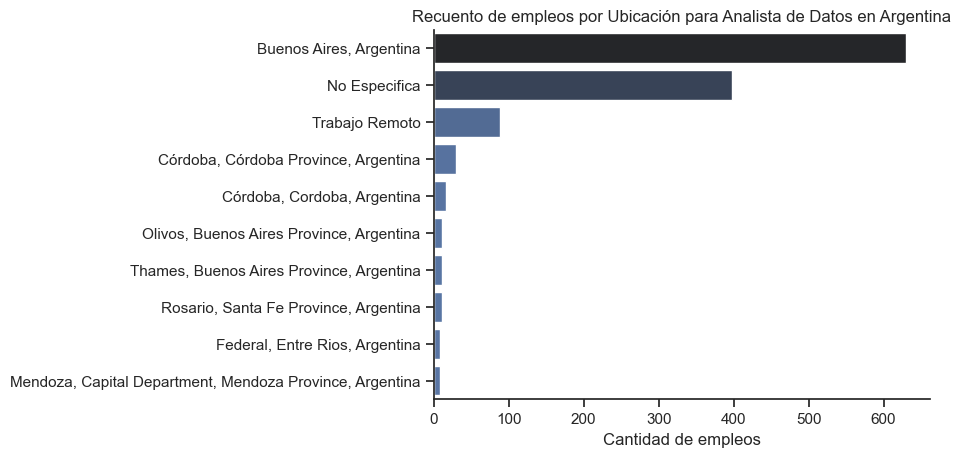

In [32]:
# Visualizamos la cantidad de empleo según cada ubicación.

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Recuento de empleos por Ubicación para Analista de Datos en Argentina')
plt.xlabel('Cantidad de empleos')
plt.ylabel('')
plt.show()

In [33]:
# Inspeccionamos para obtener una muestra de la cantidad de trabajos por empresa.
df_plot = df_job_ARG['company_name'].value_counts().to_frame().head()

df_plot

,count
company_name,
Emprego,474
Web:,22
Accenture,18
PwC Argentina,13
S&P Global,10


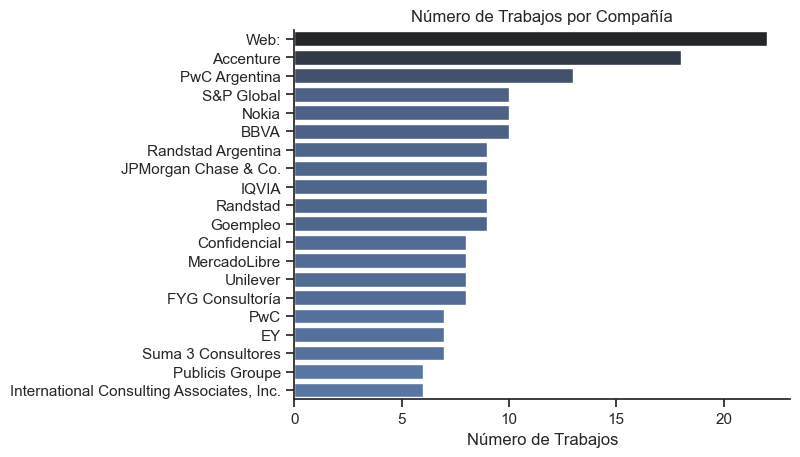

In [34]:
# Extraemos el primer elemento de la lista mediante slicing, dado que el primer resultado es una plataforma de reclutamiento.

df_plot = df_job_ARG['company_name'].value_counts().to_frame()[1:].head(20)

df_plot


# Visualizamos la cantidad de trabajos según cada compañía.
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Número de Trabajos por Compañía')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

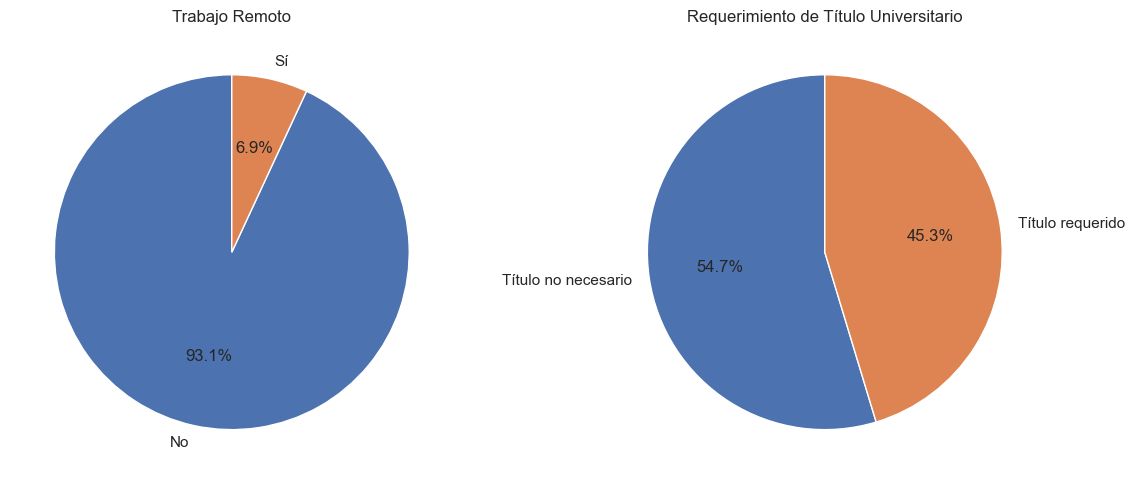

In [45]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

# Cuenta la cantidad de trabajos remotos.
counts = df_job_ARG['job_work_from_home'].value_counts()

plt.subplot(1, 2, 1)
plt.pie(counts, labels=counts.index.map({False: 'No', True: 'Sí'}), autopct='%1.1f%%', startangle=90)
plt.title('Trabajo Remoto')

# Cuenta la cantidad de trabajos sin mención de título universitario.
counts = df_job_ARG['job_no_degree_mention'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index.map({False: 'Título requerido', True: 'Título no necesario'}), autopct='%1.1f%%', startangle=90)
plt.title('Requerimiento de Título Universitario')

plt.tight_layout()
plt.show()